# Introduction to System Dynamics: Creating a Marsh Equilibrium Model Using Vensim and PySD 

 ## What is system dynamic?
   System dynamics (SD) is an effective approach for helping reveal the temporal behavior of complex systems. To understand the temporal behavior of complex systems, SD models are created and used in computer simulations to problem solve and gain a real world insight on the concepts of system feedbacks, (Neuwirth,2015).
   

## Why use a system dynamics model?   
   SD can be used to understand a myriad of complicated phenomena. Detailed simulation models depicting a specific time and place can be realistic and used to understand that particular system,( O’Sullivan, 2013, pp 22).Imagine a park was interested in preserving a natural resource like a saltwater marsh that has historically helped prevent flooding but is now having trouble keeping up with some changes in the surrounding environments. The park land manager maybe aware that the landscape is naturally shaped by and preserves itself through a series of complicated interactions with variables in its ecosystem. Still, the land manager needs a deeper understanding of these relationships to manage and preserve the landscape. To better depict the relationships between the plant life, biomass/sediment accumulation in the saltwater marsh system, the landscape manager begins with drawing a diagram of stocks and flows.
   
## What are Stocks and Flows?

  **Stocks:** Stocks are system variables that represent quantities stored in a system such as, number of rabbits in a population, money in an economy.
 
  **Flows:** Represent the movement of stocks variables among different parts of a system. Take for example the a much simpler system like the water cycle. A cloud (stock) contains rain droplets and when it rains the droplets go into a body of water. When that body of water begins to evaporate the water returns to the atmosphere creating a flow.
  
  **Parameters:** Describes the overall state of the system and governs the relationships among stocks and flows. This can also be referred to as auxiliary variables,(O’Sullivan, 2013, pp 22). 
 
This tutorial will briefly go over how to create a system dynamics model using [Vensim](https://vensim.com/), a simulation software for managing complex systems. The saltwater marsh example in the section above will be used to show how well and just how complex of a system an SD model can describe. To describe the marsh system, a Marsh Equilibrium Model (MEM) will be constructed. The python library [PySD](https://pysd.readthedocs.io/en/master/basic_usage.html#importing-a-model-and-getting-started), a library used for running and manipulating data in a SD model, will be used to analyze the resulting simulation generated by the SD model. 





# Background on Tidal Saltwater Marshs 
<details>
  <summary>Click to expand!</summary>
 Tidal wetlands contain dynamic habitats that are essential for many key stone species. Teaming with diverse flora and fauna, wetlands are known to be one of the most robust and resilient environments. The flora in these environments captures sediments and holds biomass, preventing coastal erosion. The soils captured in wetlands also act as a sponge and holds in water that would otherwise flood coastal towns and cities. Many of the sessile organisms, that call these vast landscapes home, also provide reef like structures contributing to reduced wave actions during storm surges. However, as sea level rise accelerates, due to climate change, the saltwater marshes of tidal wetlands are threated. The National Ocean Services states that over the past century, global sea levels has been rising, and that the rate at which sea level has been rising has increased over the past decade to a rate of one eighth of an inch per year, (NOAA, 2019).

 These unique environments typically have the capability of adapting to environmental changes like sea level rise or fall, given that the surrounding changes occur at a pace that allows the wetland to accrete sediment or biomass, change in elevation and accrue new vegetation. Historically, all wetland types move upland to high marsh or down to intertidal marsh as a defense to longer or shorter inundation periods. During this process marshes inherit new ecological features as the marsh changes, making environmental adaptions over time. Still, pressure from urban development hinders wetland adaption, and restricts the required space needed to move upland, during storm surge flooding, which makes it even more difficult for marshes to keep up with rising sea levels. 
</details>


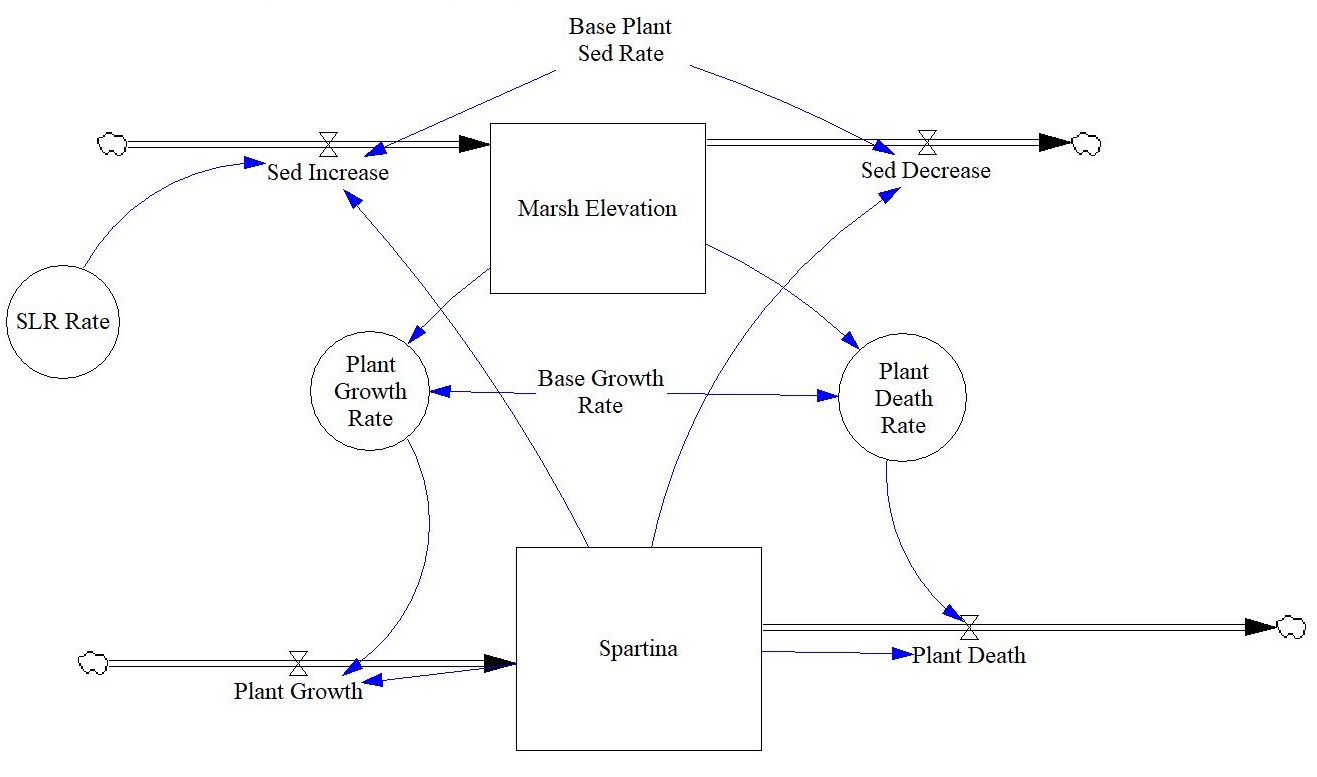

## Marsh Model Parameters:
<details>
  <summary>Click to understand image!</summary>

(01)	**Base Growth Rate**= 0.025,
	Units: 1/Year
	
(02)	**Base Plant Sed Rate**= 0.025,
	Units: 1/Year
	
(03)	**FINAL TIME** = 100,
	Units: Year,
	The final time for the simulation.

(04)	**INITIAL TIME** = 0,
	Units: Year,
	The initial time for the simulation.

(05)	**Marsh Elevation**= INTEG (Sed Increase-Sed Decrease,1),
Units: meters
	
(06)	**Plant Death**= Spartina*Plant Death Rate,
	Units: meters/Year
	
(07)	**Plant Death Rate**=
IF THEN ELSE(Marsh Elevation < 0.5 :OR: Marsh Elevation > 1.5, Base Growth Rate , 0 ), 
Units: 1/Year
	 
(08)	**Plant Growth**= Spartina * Plant Growth Rate,
	Units: meters/Year
	
(09)	**Plant Growth Rate**=
	IF THEN ELSE (Marsh Elevation > 0.5 :AND: Marsh Elevation < 1.5 , Base Growth Rate , 0 ),
	Units: 1/Year
	
(10) **SAVEPER** = TIME STEP (which is once per year),
	Units: Year, 
	Description: The frequency with which output is stored.

(11)	**Sed Decrease**= Spartina * Base Plant Sed Rate,
	      Units: meters/Year
	
(12)	**Sed Increase**= Spartina * Base Plant Sed Rate - SLR Rate,
	Units: meters/Year
	
(13)	**SLR Rate**=0.0032,
	Units: meters/Year
	
(14)	**Spartina**= INTEG (Plant Growth-Plant Death,2),
Units: meters
	
(15)	**TIME STEP** = 1,
Units: Year, 
	The time step for the simulation.
                                                                   
</details>

#### There are many tools, packages and softwares for building a system dynamics model. In this tutorial we will focus on building a simulation using Vensim and PySD.  

In [1]:
import os
import pysd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import geopandas as gpd
import pandas as pd
import gdal
import folium
from folium.plugins import TimestampedGeoJson # https://towardsdatascience.com/visualizing-air-pollution-with-folium-maps-4ce1a1880677
# use this to create time series map

#### After importing a few essental libraries for displaying the context of your model and plotting we will assign the model a name and read it in. 

In [5]:
MEMModel = pysd.read_vensim(r"MEM_pysd_Timestep_at1_run1.mdl")
MEMModel.doc()

Real Name              Py Name            Unit          Lims  \
0      Base Growth Rate     base_growth_rate       b'1/Year'  (None, None)   
1   Base Plant Sed Rate  base_plant_sed_rate       b'1/Year'  (None, None)   
2            FINAL TIME           final_time         b'Year'  (None, None)   
3          INITIAL TIME         initial_time         b'Year'  (None, None)   
4       Marsh Elevation      marsh_elevation       b'meters'  (None, None)   
5           Plant Death          plant_death  b'meters/Year'  (None, None)   
6      Plant Death Rate     plant_death_rate       b'1/Year'  (None, None)   
7          Plant Growth         plant_growth  b'meters/Year'  (None, None)   
8     Plant Growth Rate    plant_growth_rate       b'1/Year'  (None, None)   
9               SAVEPER              saveper         b'Year'   (0.0, None)   
10             SLR Rate             slr_rate  b'meters/Year'  (None, None)   
11         Sed Decrease         sed_decrease  b'meters/Year'  (None, None)   
12         Sed Increase         sed_increase  b'meters/Year'  (None, None)   
13             Spartina             spartina       b'meters'  (None, None)   
14            TIME STEP            time_step         b'Year'   (0.0, None)   

         Type                                                Eqn  \
0    constant                                           b'0.025'   
1    constant                                           b'0.025'   
2    constant                                             b'100'   
3    constant                                               b'0'   
4   component           b'INTEG ( Sed Increase-Sed Decrease, 1)'   
5   component                       b'Spartina*Plant Death Rate'   
6   component  b'IF THEN ELSE(Marsh Elevation < 0.5 :OR: Mars...   
7   component                    b'Spartina * Plant Growth Rate'   
8   component  b'IF THEN ELSE(Marsh Elevation > 0.5 :AND: Mar...   
9   component                                       b'TIME STEP'   
10   constant                                          b'0.0032'   
11  component                  b'Spartina * Base Plant Sed Rate'   
12  component       b'Spartina * Base Plant Sed Rate - SLR Rate'   
13  component            b'INTEG ( Plant Growth-Plant Death, 2)'   
14   constant                                               b'1'   

                                              Comment  
0                                                 b''  
1                                                 b''  
2               b'The final time for the simulation.'  
3             b'The initial time for the simulation.'  
4                                                 b''  
5                                                 b''  
6   b'Imagine the plants live for two years and th...  
7                                                 b''  
8                                                 b''  
9       b'The frequency with which output is stored.'  
10                                                b''  
11                                                b''  
12                                                b''  
13                                                b''  
14               b'The time step for the simulation.'

####  Running model.doc() displays your models parameters, units and settings. Now we will run the model. 

In [27]:
MEMModel.run(params={'Base Growth Rate':0.005,'SLR Rate':0.0032})
MEMModel.run()

TIME  Base Growth Rate  Base Plant Sed Rate  Marsh Elevation  \
0.0      0.0             0.005                0.025           1.0000   
1.0      1.0             0.005                0.025           0.9968   
2.0      2.0             0.005                0.025           0.9936   
3.0      3.0             0.005                0.025           0.9904   
4.0      4.0             0.005                0.025           0.9872   
...      ...               ...                  ...              ...   
96.0    96.0             0.005                0.025           0.6928   
97.0    97.0             0.005                0.025           0.6896   
98.0    98.0             0.005                0.025           0.6864   
99.0    99.0             0.005                0.025           0.6832   
100.0  100.0             0.005                0.025           0.6800   

       Plant Death Plant Death Rate  Plant Growth Plant Growth Rate  \
0.0            0.0              0.0      0.010000             0.005   
1.0            0.0              0.0      0.010050             0.005   
2.0            0.0              0.0      0.010100             0.005   
3.0            0.0              0.0      0.010151             0.005   
4.0            0.0              0.0      0.010202             0.005   
...            ...              ...           ...               ...   
96.0           0.0              0.0      0.016141             0.005   
97.0           0.0              0.0      0.016222             0.005   
98.0           0.0              0.0      0.016303             0.005   
99.0           0.0              0.0      0.016385             0.005   
100.0          0.0              0.0      0.016467             0.005   

       Sed Decrease  Sed Increase  Spartina  SLR Rate  FINAL TIME  \
0.0        0.050000      0.046800  2.000000    0.0032         100   
1.0        0.050250      0.047050  2.010000    0.0032         100   
2.0        0.050501      0.047301  2.020050    0.0032         100   
3.0        0.050754      0.047554  2.030150    0.0032         100   
4.0        0.051008      0.047808  2.040301    0.0032         100   
...             ...           ...       ...       ...         ...   
96.0       0.080707      0.077507  3.228285    0.0032         100   
97.0       0.081111      0.077911  3.244427    0.0032         100   
98.0       0.081516      0.078316  3.260649    0.0032         100   
99.0       0.081924      0.078724  3.276952    0.0032         100   
100.0      0.082333      0.079133  3.293337    0.0032         100   

       INITIAL TIME  SAVEPER  TIME STEP  
0.0               0        1          1  
1.0               0        1          1  
2.0               0        1          1  
3.0               0        1          1  
4.0               0        1          1  
...             ...      ...        ...  
96.0              0        1          1  
97.0              0        1          1  
98.0              0        1          1  
99.0              0        1          1  
100.0             0        1          1  

[101 rows x 16 columns]

#### Running your model simulates your input paramaters and produces a dataframe of your results. Let's go ahead and plot some of the column variables to analyze the relationships produced by this simulation.   

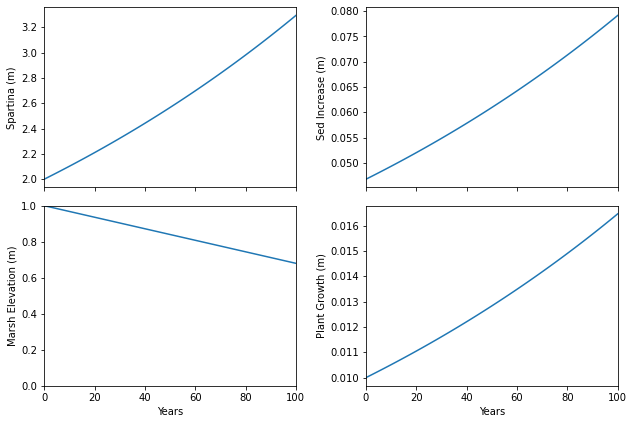

In [44]:
data= MEMModel.run(return_columns=["Spartina","Sed Increase", "Marsh Elevation","Plant Growth"])

#graphs.plot(subplots=(2,2), figsize=(6,6))
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True, subplot_kw={"xlabel":"Years"}, figsize=(9,6))

data["Spartina"].plot(ax=ax1)
ax1.set_ylabel("Spartina (m)")
#ax1.set_ylim(0,1)
ax1.set_xlim(0,100)

data["Sed Increase"].plot(ax=ax2)
ax2.set_ylabel("Sed Increase (m)")

data["Marsh Elevation"].plot(ax=ax3)
ax3.set_ylim(0,1)
ax3.set_ylabel("Marsh Elevation (m)")

data["Plant Growth"].plot(ax=ax4)
ax4.set_ylabel("Plant Growth (m)")
plt.tight_layout()


#### Plotting some of the relationships in the simulation reveals that the current sea level rise rate of 0.0032 meters/year will eventually lead to slight marsh sediment subsidence, despite the increase of plant growth and sedimentation. Now lets say that we wanted to see how these relationships would change if sea level rise rate was neither rising or falling. To do this we will change the input value of sea level rise to 0 using the function call params below. You can also simultaneously run your simulation to ensure that the parameter's value has changed.       

In [45]:
MEMModel.run(params={'SLR Rate':0})

TIME  Base Growth Rate  Base Plant Sed Rate  Marsh Elevation  \
0.0      0.0             0.005                0.025              1.0   
1.0      1.0             0.005                0.025              1.0   
2.0      2.0             0.005                0.025              1.0   
3.0      3.0             0.005                0.025              1.0   
4.0      4.0             0.005                0.025              1.0   
...      ...               ...                  ...              ...   
96.0    96.0             0.005                0.025              1.0   
97.0    97.0             0.005                0.025              1.0   
98.0    98.0             0.005                0.025              1.0   
99.0    99.0             0.005                0.025              1.0   
100.0  100.0             0.005                0.025              1.0   

       Plant Death Plant Death Rate  Plant Growth Plant Growth Rate  \
0.0            0.0              0.0      0.010000             0.005   
1.0            0.0              0.0      0.010050             0.005   
2.0            0.0              0.0      0.010100             0.005   
3.0            0.0              0.0      0.010151             0.005   
4.0            0.0              0.0      0.010202             0.005   
...            ...              ...           ...               ...   
96.0           0.0              0.0      0.016141             0.005   
97.0           0.0              0.0      0.016222             0.005   
98.0           0.0              0.0      0.016303             0.005   
99.0           0.0              0.0      0.016385             0.005   
100.0          0.0              0.0      0.016467             0.005   

       Sed Decrease  Sed Increase  Spartina  SLR Rate  FINAL TIME  \
0.0        0.050000      0.050000  2.000000         0         100   
1.0        0.050250      0.050250  2.010000         0         100   
2.0        0.050501      0.050501  2.020050         0         100   
3.0        0.050754      0.050754  2.030150         0         100   
4.0        0.051008      0.051008  2.040301         0         100   
...             ...           ...       ...       ...         ...   
96.0       0.080707      0.080707  3.228285         0         100   
97.0       0.081111      0.081111  3.244427         0         100   
98.0       0.081516      0.081516  3.260649         0         100   
99.0       0.081924      0.081924  3.276952         0         100   
100.0      0.082333      0.082333  3.293337         0         100   

       INITIAL TIME  SAVEPER  TIME STEP  
0.0               0        1          1  
1.0               0        1          1  
2.0               0        1          1  
3.0               0        1          1  
4.0               0        1          1  
...             ...      ...        ...  
96.0              0        1          1  
97.0              0        1          1  
98.0              0        1          1  
99.0              0        1          1  
100.0             0        1          1  

[101 rows x 16 columns]

#### This time, we will comment out the y axes limitaion to see the slight change in Marsh Elevation. The plots below reveal that marsh elevation reaches equilibrum when the sea level rise rate (SLR Rate) is 0 meters/year, or rather when sea level is neither rising or falling. However, notice how the other graphs have not changed despite changing the constant value for the SLR Rate parameter. Review the dataframe to see what other parameter values can be changed to influence the growth rate of the plants to change and make our model more realistic.  

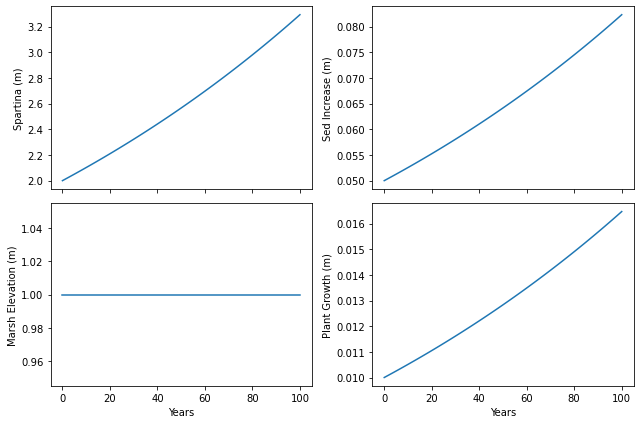

In [46]:
data= MEMModel.run(return_columns=["Spartina","Sed Increase", "Marsh Elevation","Plant Growth"])


fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True, subplot_kw={"xlabel":"Years"},figsize=(9,6))

data["Spartina"].plot(ax=ax1)
ax1.set_ylabel("Spartina (m)")

data["Sed Increase"].plot(ax=ax2)
ax2.set_ylabel("Sed Increase (m)")

data["Marsh Elevation"].plot(ax=ax3)
#ax3.set_ylim(0,1)
ax3.set_ylabel("Marsh Elevation (m)")

data["Plant Growth"].plot(ax=ax4)
ax4.set_ylabel("Plant Growth (m)")
plt.tight_layout()

#### To demonstrate changing multiple parameters lets fastforward to the future and try to model the worst case senario. To do this we will push our parameter values to a very high SLR rate, low base plant sedimentation rate, and a low plant growth rate. 

In [59]:
MEMModel.run(params={'SLR Rate':0.5,'Base Plant Sed Rate':-0.015,'Base Growth Rate': -0.005})

TIME  Base Growth Rate  Base Plant Sed Rate  Marsh Elevation  \
0.0      0.0            -0.005               -0.015              1.0   
1.0      1.0            -0.005               -0.015              0.5   
2.0      2.0            -0.005               -0.015              0.0   
3.0      3.0            -0.005               -0.015             -0.5   
4.0      4.0            -0.005               -0.015             -1.0   
...      ...               ...                  ...              ...   
96.0    96.0            -0.005               -0.015            -47.0   
97.0    97.0            -0.005               -0.015            -47.5   
98.0    98.0            -0.005               -0.015            -48.0   
99.0    99.0            -0.005               -0.015            -48.5   
100.0  100.0            -0.005               -0.015            -49.0   

       Plant Death Plant Death Rate  Plant Growth Plant Growth Rate  \
0.0       0.000000              0.0         -0.01            -0.005   
1.0       0.000000              0.0          0.00               0.0   
2.0      -0.009950           -0.005          0.00               0.0   
3.0      -0.010000           -0.005          0.00               0.0   
4.0      -0.010050           -0.005          0.00               0.0   
...            ...              ...           ...               ...   
96.0     -0.015901           -0.005          0.00               0.0   
97.0     -0.015981           -0.005          0.00               0.0   
98.0     -0.016061           -0.005          0.00               0.0   
99.0     -0.016141           -0.005          0.00               0.0   
100.0    -0.016222           -0.005          0.00               0.0   

       Sed Decrease  Sed Increase  Spartina  SLR Rate  FINAL TIME  \
0.0       -0.030000     -0.530000  2.000000       0.5         100   
1.0       -0.029850     -0.529850  1.990000       0.5         100   
2.0       -0.029850     -0.529850  1.990000       0.5         100   
3.0       -0.029999     -0.529999  1.999950       0.5         100   
4.0       -0.030149     -0.530149  2.009950       0.5         100   
...             ...           ...       ...       ...         ...   
96.0      -0.047704     -0.547704  3.180262       0.5         100   
97.0      -0.047942     -0.547942  3.196163       0.5         100   
98.0      -0.048182     -0.548182  3.212144       0.5         100   
99.0      -0.048423     -0.548423  3.228205       0.5         100   
100.0     -0.048665     -0.548665  3.244346       0.5         100   

       INITIAL TIME  SAVEPER  TIME STEP  
0.0               0        1          1  
1.0               0        1          1  
2.0               0        1          1  
3.0               0        1          1  
4.0               0        1          1  
...             ...      ...        ...  
96.0              0        1          1  
97.0              0        1          1  
98.0              0        1          1  
99.0              0        1          1  
100.0             0        1          1  

[101 rows x 16 columns]

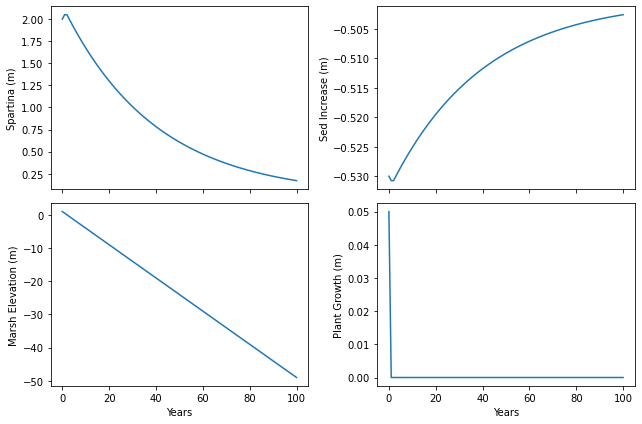

In [68]:
MEMModel.run(params={'SLR Rate':0.5,'Base Plant Sed Rate':-0.015,'Base Growth Rate': 0.025})
data= MEMModel.run(return_columns=["Spartina","Sed Increase", "Marsh Elevation","Plant Growth"])


fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True, subplot_kw={"xlabel":"Years"}, figsize=(9,6))

data["Spartina"].plot(ax=ax1)
ax1.set_ylabel("Spartina (m)")

data["Sed Increase"].plot(ax=ax2)
ax2.set_ylabel("Sed Increase (m)")

data["Marsh Elevation"].plot(ax=ax3)
#ax3.set_ylim(0,1)
ax3.set_ylabel("Marsh Elevation (m)")

data["Plant Growth"].plot(ax=ax4)
ax4.set_ylabel("Plant Growth (m)")
plt.tight_layout()

#### You may wonder what would happen to the marsh when sea level is falling. We will change the parameter value for SLR Rate to -0.001 and again choose the param function.  

In [62]:
MEMModel.run(params={'SLR Rate':-0.001, 'Base Plant Sed Rate':0.025, 'Base Growth Rate': 0.025})

TIME  Base Growth Rate  Base Plant Sed Rate  Marsh Elevation  \
0.0      0.0             0.025                0.025            1.000   
1.0      1.0             0.025                0.025            1.001   
2.0      2.0             0.025                0.025            1.002   
3.0      3.0             0.025                0.025            1.003   
4.0      4.0             0.025                0.025            1.004   
...      ...               ...                  ...              ...   
96.0    96.0             0.025                0.025            1.096   
97.0    97.0             0.025                0.025            1.097   
98.0    98.0             0.025                0.025            1.098   
99.0    99.0             0.025                0.025            1.099   
100.0  100.0             0.025                0.025            1.100   

       Plant Death Plant Death Rate  Plant Growth Plant Growth Rate  \
0.0            0.0              0.0      0.050000             0.025   
1.0            0.0              0.0      0.051250             0.025   
2.0            0.0              0.0      0.052531             0.025   
3.0            0.0              0.0      0.053845             0.025   
4.0            0.0              0.0      0.055191             0.025   
...            ...              ...           ...               ...   
96.0           0.0              0.0      0.535132             0.025   
97.0           0.0              0.0      0.548511             0.025   
98.0           0.0              0.0      0.562223             0.025   
99.0           0.0              0.0      0.576279             0.025   
100.0          0.0              0.0      0.590686             0.025   

       Sed Decrease  Sed Increase   Spartina  SLR Rate  FINAL TIME  \
0.0        0.050000      0.051000   2.000000    -0.001         100   
1.0        0.051250      0.052250   2.050000    -0.001         100   
2.0        0.052531      0.053531   2.101250    -0.001         100   
3.0        0.053845      0.054845   2.153781    -0.001         100   
4.0        0.055191      0.056191   2.207626    -0.001         100   
...             ...           ...        ...       ...         ...   
96.0       0.535132      0.536132  21.405288    -0.001         100   
97.0       0.548511      0.549511  21.940420    -0.001         100   
98.0       0.562223      0.563223  22.488931    -0.001         100   
99.0       0.576279      0.577279  23.051154    -0.001         100   
100.0      0.590686      0.591686  23.627433    -0.001         100   

       INITIAL TIME  SAVEPER  TIME STEP  
0.0               0        1          1  
1.0               0        1          1  
2.0               0        1          1  
3.0               0        1          1  
4.0               0        1          1  
...             ...      ...        ...  
96.0              0        1          1  
97.0              0        1          1  
98.0              0        1          1  
99.0              0        1          1  
100.0             0        1          1  

[101 rows x 16 columns]

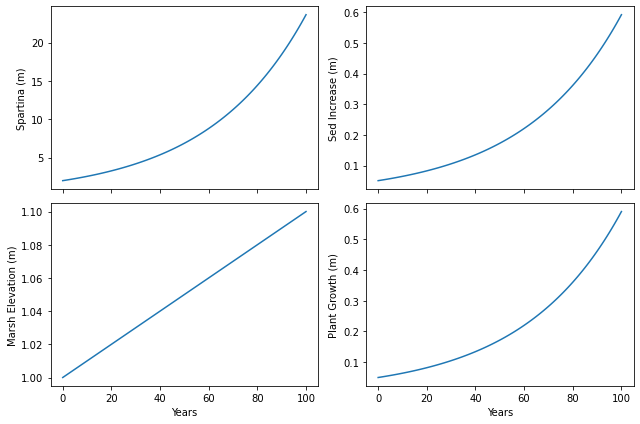

In [63]:
data= MEMModel.run(return_columns=["Spartina","Sed Increase", "Marsh Elevation","Plant Growth"])


fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,sharex=True, subplot_kw={"xlabel":"Years"}, figsize=(9,6))

data["Spartina"].plot(ax=ax1)
ax1.set_ylabel("Spartina (m)")

data["Sed Increase"].plot(ax=ax2)
ax2.set_ylabel("Sed Increase (m)")

data["Marsh Elevation"].plot(ax=ax3)
#ax3.set_ylim(0,1)
ax3.set_ylabel("Marsh Elevation (m)")

data["Plant Growth"].plot(ax=ax4)
ax4.set_ylabel("Plant Growth (m)")
plt.tight_layout()

#### After you have analyzed the relationships between each variable, you can export your data to text file clean and join it to geographic data in ArcGIS or QGIS if you choose to proceed with other analysis.Remember, before you export your data, don't forget to change your parameter values so that the exported text files reflects the simulation data of choice as shown below. 

In [18]:
#Today:
MEMModel.run(params={'Base Growth Rate':0.005,'SLR Rate':0.0032})
data_T = MEMModel.run(return_columns=["Spartina","Sed Increase", "Marsh Elevation","Plant Growth","TIME","SLR Rate","TIME STEP"])
data.to_csv("Today_T.csv")

In [21]:
#Future:
MEMModel.run(params={'SLR Rate':0.5,'Base Plant Sed Rate':-0.015,'Base Growth Rate': -0.005})
data_F = MEMModel.run(return_columns=["Spartina","Sed Increase", "Marsh Elevation","Plant Growth","TIME","SLR Rate","TIME STEP"])
data.to_csv("Future_F.csv")

In [22]:
#Past:
MEMModel.run(params={'SLR Rate':-0.001, 'Base Plant Sed Rate':0.025, 'Base Growth Rate': 0.025})
data_P = MEMModel.run(return_columns=["Spartina","Sed Increase", "Marsh Elevation","Plant Growth","TIME","SLR Rate","TIME STEP"])
data.to_csv("Past_P.csv")

### Spatial Modeling

Suppose this model had real surveyed data or that our model generated data in $meters^{2}$ instead of meters and that we wanted to vizusialize a spatio-temporal relationship in the model. We can save columns from our model's dataframe that simuates marsh elevation and spartina growth, at today's sea level rise rate, to a csv. We will then try to spatially vizualize the results using ArcGIS's time series function. A breif description of these steps to do this are as follows:

1.) Import your data to a geodatabase in ArcGIS. 

2.) Find a geographic layer/shape file, 

3.) Select desired features and export to new layer

4.) Import it and join the table.

5.) Make sure your your time and date columns are not labled time an date as they are reserved words in ArcGIS. 

6.) On the Time tab in layer properties enable time for both the table and shapefile.

7.) Then proceed to configure your play setting in the time series tool. 

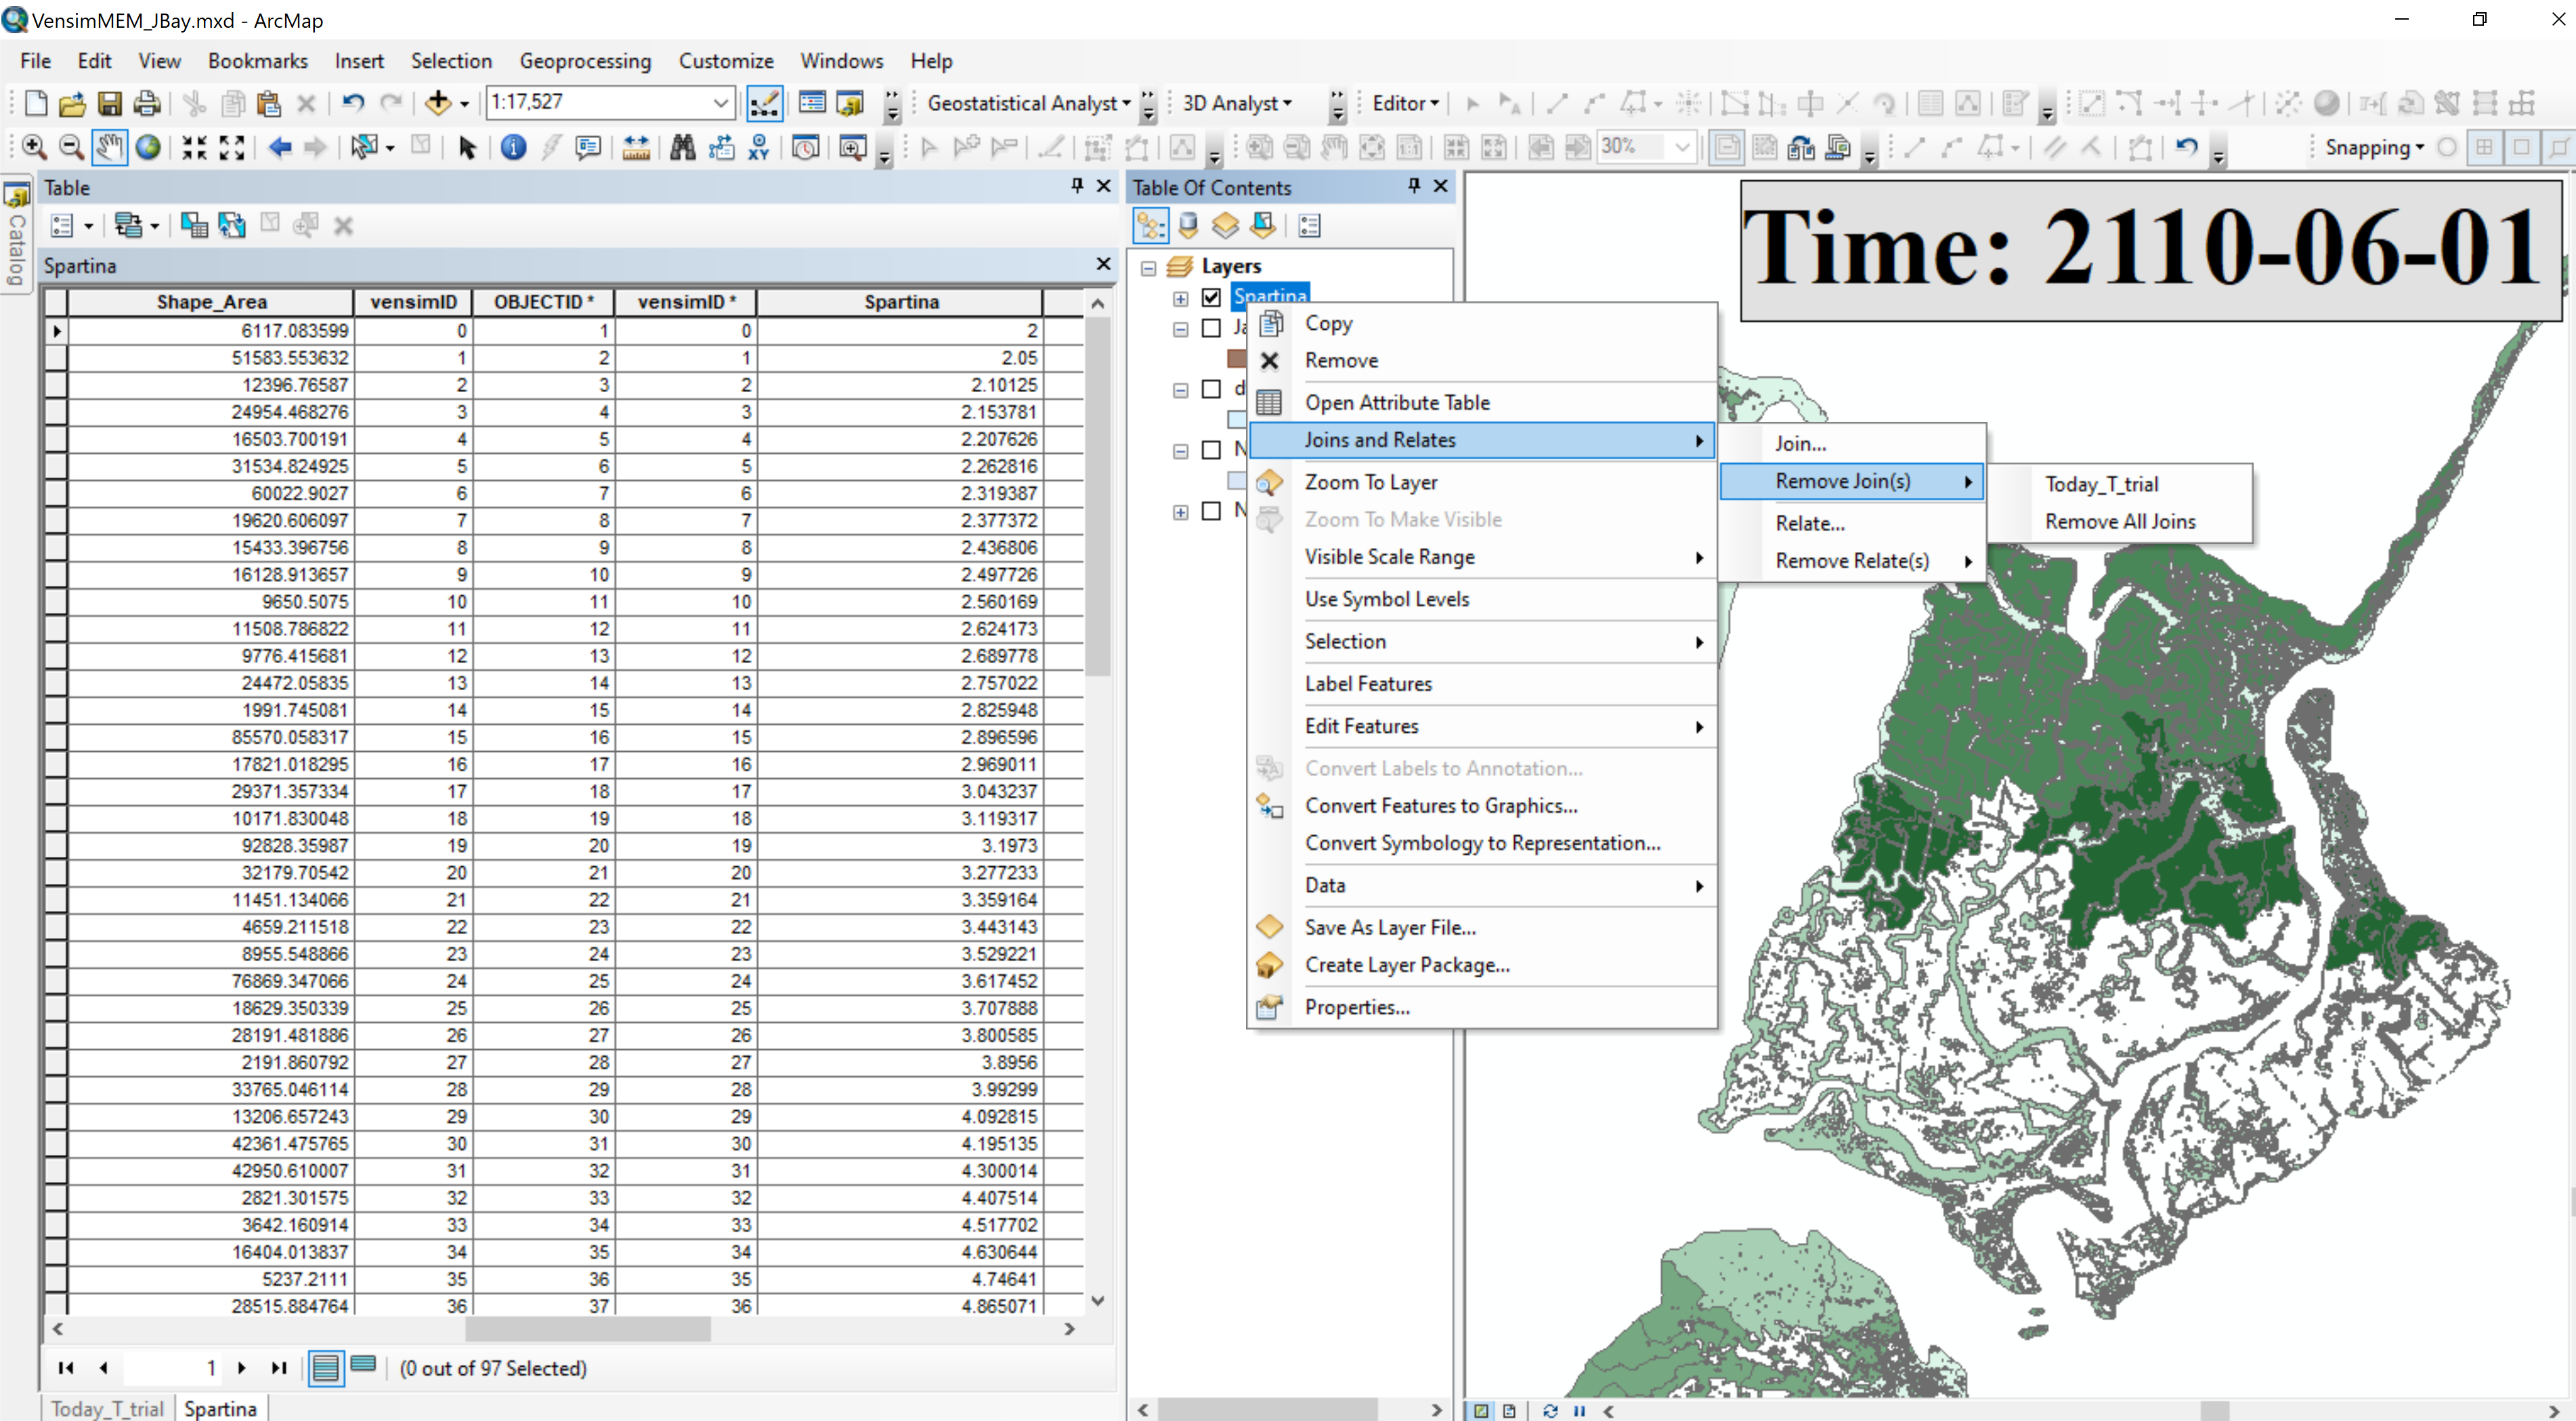


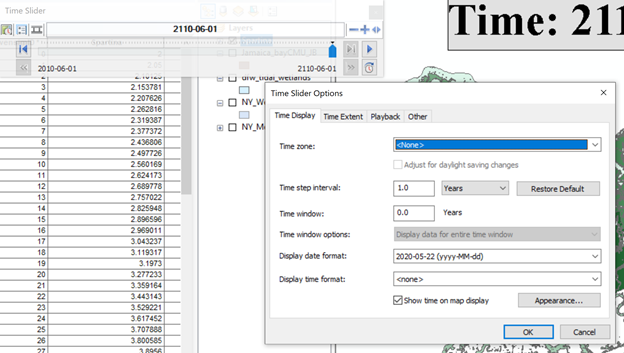


For a more detailed tutorial on this visit [ArcGIS Time Series Function](https://blogs.library.duke.edu/data/2011/07/18/time-series-visualizations-in-arcgis-an-introduction/).Below is the output time sereies map showing the spatio-temporal relationship between spartina growth and time in a wetland in Jamaica Bay. 

In [2]:
from IPython.display import Video

dim_percentage = 0.5
width, height = 1280 * dim_percentage, 608 * dim_percentage

Video(data=r"Vensimmem Jbay-1.m4v", embed=True, width=width, height=height)

Folium allows you to create polygons, join data to shape files on a variety of base maps. Folium also has the capability of creating a time series map for the purpose of displaying spatio-temporal realtionships. A tutorial for this can be found here: [Folium Time Series](https://towardsdatascience.com/visualizing-air-pollution-with-folium-maps-4ce1a1880677)

## Results
<details>
  <summary>Click to interpret results!</summary>
   The model in this example showed that the saltwater marsh was able to reach equilibrium when the SLR rate is at 0. This meant that sea level was neither rising or falling and the marsh elevation did not change although there was some plant growth and sediment was still accruing. The model also effectively showed how the marsh elevation would change if there was an extreme rate of sea level rise and if sea level would fall. Still, it is evident that manually manipulating the plant growth rate created some error in the relationship between marsh elevation and the plant life. Manually changing the plant growth rate value allowed there to be a scenario in which the marsh experience subsidence although the plant life was still growing. Additionally, variables, rates and parameter units had to be expressed in the same unit of measure to effectivly run the model, causing problems in terms of realistically describing the wetland system and it's realtionship with sea level rise.For example, sea level rise is currently accelerating and needed to be described in $meters/year^{2}$ (Weeman,2018); spartina growth needed to be represented in $meters^{2}/year$ or in percent coverage to describe change in marsh surface cover.Therefore, this particular model’s ability to describe the relationships between, SLR, sediment accrual and plant life (Spartina) had errors suggesting that the model parameters need to be improved.        
</details>

## Conclusion and Discussion: 
<details>
  <summary>Click to read discussion!</summary>
   The SD model generated in this example helped reveal minute details hidden in the interactions between variables, that are normally conceptually obscured. Vensim and PySD work together to help visualize the foundational concepts within a complex system, such as a saltwater marsh. Perhaps, the most useful aspect of SD modeling is its ability to make researchers aware of existing parameters, and the core mathematical functions on which stocks and flows rely. SD models are also extremely flexible and allow detailed changes to best describe a system. 

   One of the most interesting aspects of SD models is that they are useful tools for any discipline. In this case SD modeling was used to describe and better understand a tidal saltwater marsh’s ability to be resilient to Sea Level Rise. With climate change accelerating the rate at which sea level rises each year, many environmental systems need to be better understood if they are to be preserved. The derived results of this tutorial’s analysis showed that SD models are useful for this, and can guide many land managers, and environmental rehabilitation projects. This exact ability can be observed in the current constructed MEM model by changing parameters values.  The limitation of SD models is that the results are strictly temporal. This means that to analyze spatio-temporal relationships, the model results need to be coupled with other software and libraries that can join and manipulate geographic data. Since environmental relationships are increasingly being investigated, it is imperative to extend the capabilities of SD modeling by developing ways in which the model could have spatio-temporal abilities.  
</details>


## Bibliography
<details>
  <summary>Click to see references!</summary>

Alizad, K., Hagen, S. C., Morris, J. T., Bacopoulos, P., Bilskie, M. V., Weishampel, J. F., & Medeiros, S. C. (2016). A coupled, two-dimensional hydrodynamic-marsh model with biological feedback. Ecological Modelling, 327, 29-43.

Carremans, B. (2018, November 26). Visualizing Air Pollution with Folium Maps. Retrieved May 15, 2020, from https://towardsdatascience.com/visualizing-air-pollution-with-folium-maps-4ce1a1880677.

Buckley, S., Al-Haj, A., Fulweiler, R. (2016). Sentinels of Change — Are Salt  Marshes in LIS Keeping Pace with Sea  Level Rise?. Laboratory of Coastal Ecology and Biogeochemistry Departments of Earth & Environment and Biology Boston University. http://neiwpcc.org/wp-content/uploads/2018/09/2013-039-Final-Report.pdf

DEC. (n.d.). Tidal Wetlands Trends. Retrieved March 23, 2020, from https://www.dec.ny.gov/lands/5113.html

Hartig, E. K., Gornitz, V., Kolker, A., Mushacke, F., & Fallon, D. (2002). Anthropogenic and climate-change impacts on salt marshes of Jamaica Bay, New York City. Wetlands, 22(1), 71-89.

Lindsey, R. (2019, November 19). Climate Change: Global Sea Level: NOAA Climate.gov. Retrieved March 21, 2020, from https://www.climate.gov/news-features/understanding-climate/climate-change-global-sea-level 

Ma, Chun & Zhang, G.Y. & Zhang, Xiaochun & Zhou, B. & Mao, T.Y.. (2012). Simulation modeling for wetland utilization and protection based on system dynamic model in a coastal city, China. Procedia Environmental Sciences. 13. 202–213. 10.1016/j.proenv.2012.01.019.

Neuwirth, C., Peck, A., & Simonović, S. P. (2015). Modeling structural change in spatial system dynamics: A Daisyworld example. Environmental Modelling & Software, 65, 30-40.
NOAA. (2019, October 09). Is Sea Level Rising? National Ocean Service website, Retrieved March 21, 2020, https://oceanservice.noaa.gov/facts/sealevel.html 

NOAA. (n.d.). Sea Level Rise Viewer, Retrieved May 17,2020 from https://coast.noaa.gov/slr/#/layer/slr/0/-8186410.796769099/4960378.097841839/13/satellite/none/0.8/2050/interHigh/midAccretion

NYC Parks. (n.d.a). Salt Marshes in New York City Parks - Jamaica Bay Park. Retrieved May 17, 2020, from https://www.nycgovparks.org/parks/jamaica-bay-park/highlights/11326 
NYC Parks. (n.d.b). Jamaica Bay- Jamaica Bay Park. Retrieved May 17, 2020, from https://www.nycgovparks.org/parks/jamaica-bay-park/history

O'Sullivan, D., & Perry, G. L. (2013). Spatial simulation: exploring pattern and process. John Wiley & Sons.
Schile, L. M., Callaway, J. C., Morris, J. T., Stralberg, D., Parker, V. T., & Kelly, M. (2014). Modeling tidal marsh distribution with sea-level rise: Evaluating the role of vegetation, sediment, and upland habitat in marsh resiliency. PloS one, 9(2).

Schoell, M. (2019, February 13). Making way for coastal wetlands: a look at sea level rise and urban development. Retrieved March 21, 2020, from https://environment-review.yale.edu/making-way-coastal-wetlands-look-sea-level-rise-and-urban-development 
    
Weeman, K. (2018, June 13). New study finds sea level rise accelerating – Climate Change: Vital Signs of the Planet. Retrieved May 20, 2020, from https://climate.nasa.gov/news/2680/new-study-finds-sea-level-rise-accelerating/

Wetland and Aquatic Research Center, U. S. G. (n.d.). Influence of Sea-Level Rise on Wetland Vegetation Community Structure, Primary Productivity, Organic Matter Decomposition and Carbon Storage. Retrieved March 21, 2020, from https://www.usgs.gov/centers/wetland-and-aquatic-research-center/science/influence-sea-level-rise-wetland-vegetation?qt-science_center_objects=0#qt-science_center_objects     

</details>